In [16]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ANOVA testing is similar to a two-sample t-test in that you are comparing a quantitative variable to a categorical variable. However, in an ANOVA setting the categorical variable is **non-binary**. This means that there are more than 2 options within the categorical variable.\
An example of this difference would be the differences in sales between 2 stores of a chain (where a two-sample t-test would be used) or the sales differences in more than 2 stores (ANOVA would be used).\
If we had stores 'A', 'B' and 'C', we would need to test A against B, then A against C, then B against C to get all the combinations and to see if either of them are significantly different to one another. The problem with doing this is that the chances of an error such as a false positive or false negative occurring increases with the number of tests. 

To counteract this, an ANOVA test does all of them simultaneously and provides a p-value and an f-statistic. This p-value will only show whether there is a significant difference 

In [2]:
df = pd.read_csv('veryants.csv')
df.head()

,Sale,Store
0,73.57,A
1,38.37,A
2,49.36,A
3,61.96,A
4,38.74,A


In [8]:
a = df.Sale[df.Store == 'A']
b = df.Sale[df.Store == 'B']
c = df.Sale[df.Store == 'C']
a.head()

0    73.57
1    38.37
2    49.36
3    61.96
4    38.74
Name: Sale, dtype: float64

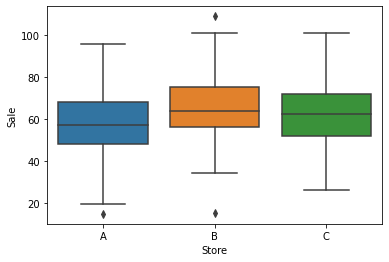

In [13]:
boxplot = sns.boxplot(data=df, x='Store', y='Sale')
plt.show()

In [15]:
pval = stats.f_oneway(a,b,c)[1]
pval

0.00015355234908845413

In [18]:
tukey_results = pairwise_tukeyhsd(df['Sale'], df['Store'], 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   7.2763  0.001  3.2263 11.3264   True
     A      C    4.011 0.0529 -0.0391  8.0611  False
     B      C  -3.2653  0.141 -7.3154  0.7847  False
----------------------------------------------------
